In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [4]:
# copy demo into current directory
ac.copydemo('ezp')

# start AUTO with runner object
runner = ra.runAUTO()

print("\n***Compute a solution family***")
ezp = ac.run(e='ezp',c='ezp',runner=runner)

print("\n***Compute one leg of the bifurcating family***")
ezp = ezp + ac.run(ezp('BP1'),ISW=-1,runner=runner)

print("\n***Compute the other leg of the bifurcating family***")
ezp = ezp + ac.run(ezp('BP1'),ISW=-1,DS='-',runner=runner)
ac.save(ezp,'ezp')

Copying demo ezp ... done

***Compute a solution family***
gfortran -fopenmp -O -c ezp.f90 -o ezp.o
gfortran -fopenmp -O ezp.o -o ezp.exe /auto/lib/*.o
Starting ezp ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)   
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    12  UZ    2   2.00000E+00   7.88670E-01   3.28950E-01   0.00000E+00   1.24822E+00   0.00000E+00
   1    20  BP    3   3.51383E+00   2.78191E+00   1.18642E+00   0.00000E+00   3.99996E+00   0.00000E+00
   1    29  UZ    4   2.00000E+00   6.57685E+00   2.89402E+00   0.00000E+00   8.26877E+00   0.00000E+00
   1    50  EP    5   9.97519E-03   2.20516E+01   1.01994E+01   0.00000E+00   2.31756E+01   0.00000E+00

 Total Time    0.330E-01
ezp ... done

***Compute one leg of the bifurcating family***
Starting ezp ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Created plot


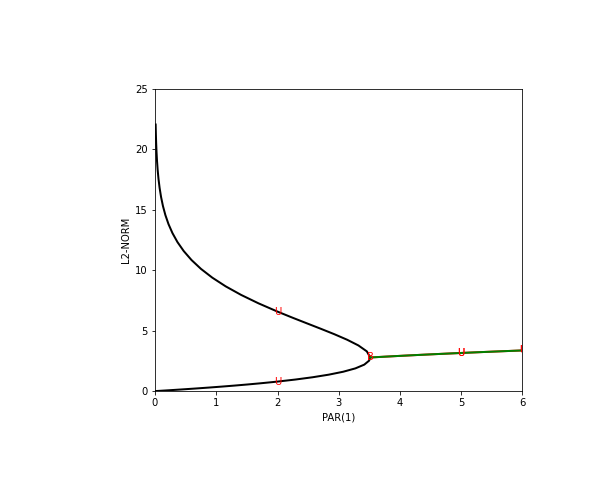

In [6]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('ezp')
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [7]:
# clean up files

ac.clean()
ac.delete('ezp')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.ezp ... done
Deleting s.ezp ... done
Deleting d.ezp ... done
